In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'EUR=X'
numbers_in_currency = 'EUR'
share_name = 'TKA.DE'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares
0,2013-12-31,9088,-7647,1441,-257,4058,4317,6810,20916,0,...,35458,3784,0,1926,17354,6602,32439,39,-247,566.94
1,2014-03-31,10269,-8707,1562,272,5035,5633,7709,21440,0,...,36428,4637,0,2519,18703,6484,33488,-361,-285,566.94
2,2014-06-30,10720,-9049,1671,43,3511,5711,7864,20252,0,...,35264,4518,0,1190,17383,6455,32339,154,-273,566.94
3,2014-09-30,11135,-9591,1544,-49,4030,5808,7529,20447,0,...,36430,4936,0,1071,17912,6651,33447,1071,-480,566.94
4,2014-12-31,10044,-8414,1630,47,3641,5353,8043,20359,0,...,36489,4843,0,1268,17818,6601,33772,-386,-246,566.94


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2022-12-31,2023-02-11,622.53,9018,-7851,1167,98,7160,6379,9208,...,1856,36104,4052,0,1162,12374,2750,22146,-137,-224
37,2023-03-31,2023-04-21,622.53,10107,-9193,914,-202,5835,7384,8468,...,1872,35132,4344,0,1697,13440,1252,21651,206,-415
38,2023-06-30,2023-07-21,622.53,9598,-8397,1201,107,6163,7165,8131,...,1853,34967,4449,0,1696,13303,1240,21536,599,-267
39,2023-09-30,2023-10-21,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,1828,33291,4270,0,1712,13117,1313,21452,1396,-851
40,2023-12-31,2024-02-11,622.53,8181,-7383,798,-304,6629,5767,7986,...,1784,32068,3926,0,1653,12420,1276,21290,-424,-300


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2022-12-31,2023-02-11,622.53,9018,-7851,1167,98,7160,6379,9208,...,36104,4052,0,1162,12374,2750,22146,-137,-224,0.980663
37,2023-03-31,2023-04-21,622.53,10107,-9193,914,-202,5835,7384,8468,...,35132,4344,0,1697,13440,1252,21651,206,-415,0.932003
38,2023-06-30,2023-07-21,622.53,9598,-8397,1201,107,6163,7165,8131,...,34967,4449,0,1696,13303,1240,21536,599,-267,0.918362
39,2023-09-30,2023-10-21,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,33291,4270,0,1712,13117,1313,21452,1396,-851,0.918837
40,2023-12-31,2024-02-11,622.53,8181,-7383,798,-304,6629,5767,7986,...,32068,3926,0,1653,12420,1276,21290,-424,-300,0.929674


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2022-12-31,2023-02-11,622.53,9018,-7851,1167,98,7160,6379,9208,...,36104,4052,0,1162,12374,2750,22146,-137,-224,0.980663
37,2023-03-31,2023-04-21,622.53,10107,-9193,914,-202,5835,7384,8468,...,35132,4344,0,1697,13440,1252,21651,206,-415,0.932003
38,2023-06-30,2023-07-21,622.53,9598,-8397,1201,107,6163,7165,8131,...,34967,4449,0,1696,13303,1240,21536,599,-267,0.918362
39,2023-09-30,2023-10-21,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,33291,4270,0,1712,13117,1313,21452,1396,-851,0.918837
40,2023-12-31,2024-02-11,622.53,8181,-7383,798,-304,6629,5767,7986,...,32068,3926,0,1653,12420,1276,21290,-424,-300,0.929674


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-02-17,18.475496,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,0.085143,0.914857,8.420662,8.08351,8.958107,4.49163,0.158561,-0.028279,-0.028992,-0.34051
1,2014-02-24,18.176538,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,0.085143,0.914857,8.420662,8.08351,8.958107,4.49163,0.158561,-0.028279,-0.028992,-0.34051
2,2014-03-03,18.006367,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,0.085143,0.914857,8.420662,8.08351,8.958107,4.49163,0.158561,-0.028279,-0.028992,-0.34051
3,2014-03-10,16.552979,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,0.085143,0.914857,8.420662,8.08351,8.958107,4.49163,0.158561,-0.028279,-0.028992,-0.34051
4,2014-03-17,17.417650,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,0.085143,0.914857,8.420662,8.08351,8.958107,4.49163,0.158561,-0.028279,-0.028992,-0.34051


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-02-17,18.475496,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,4.49163,0.158561,-0.028279,-0.028992,-0.34051,-10.189200,3.469526,0.288141,1.068868,9.156030
1,2014-02-24,18.176538,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,4.49163,0.158561,-0.028279,-0.028992,-0.34051,-10.024326,3.413384,0.283478,1.064206,9.007873
2,2014-03-03,18.006367,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,4.49163,0.158561,-0.028279,-0.028992,-0.34051,-9.930476,3.381427,0.280824,1.061552,8.923540
3,2014-03-10,16.552979,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,4.49163,0.158561,-0.028279,-0.028992,-0.34051,-9.128935,3.108495,0.258158,1.038885,8.203274
4,2014-03-17,17.417650,2013-12-31,9088.0,-1.813243,5.325078,566.94,1144.0,2.01785,4058.0,...,4.49163,0.158561,-0.028279,-0.028992,-0.34051,-9.605800,3.270872,0.271643,1.052370,8.631786


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

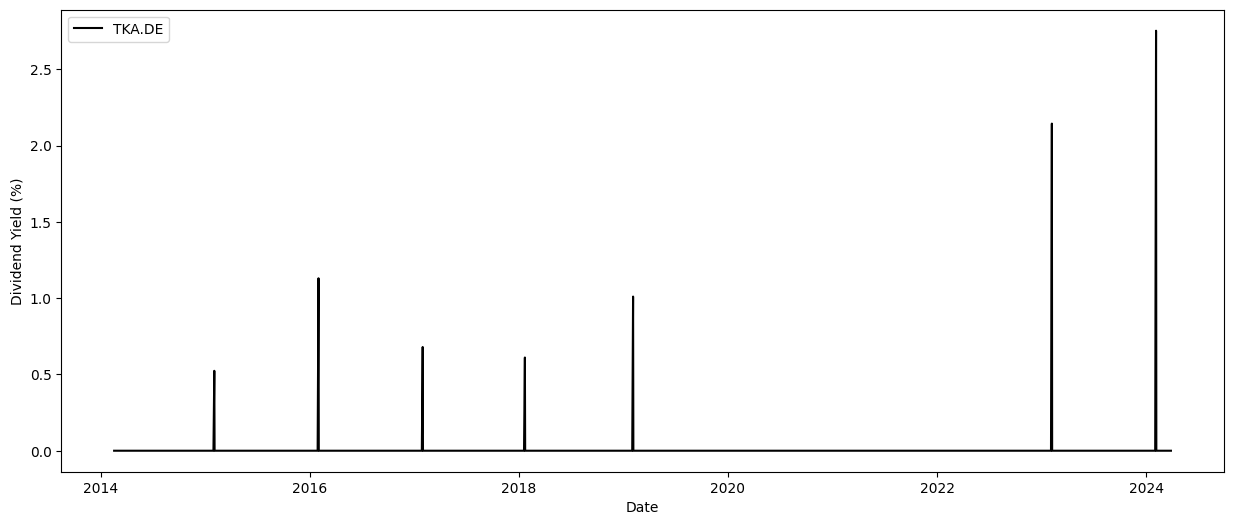

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   -0.359818
share_price      1.000000
Name: share_price, dtype: float64


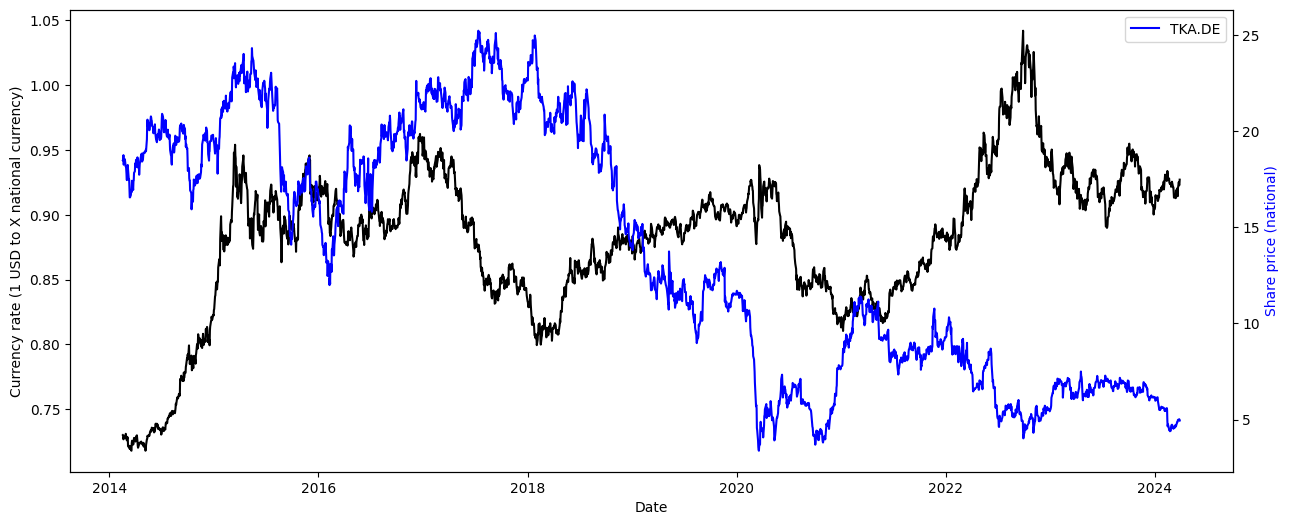

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

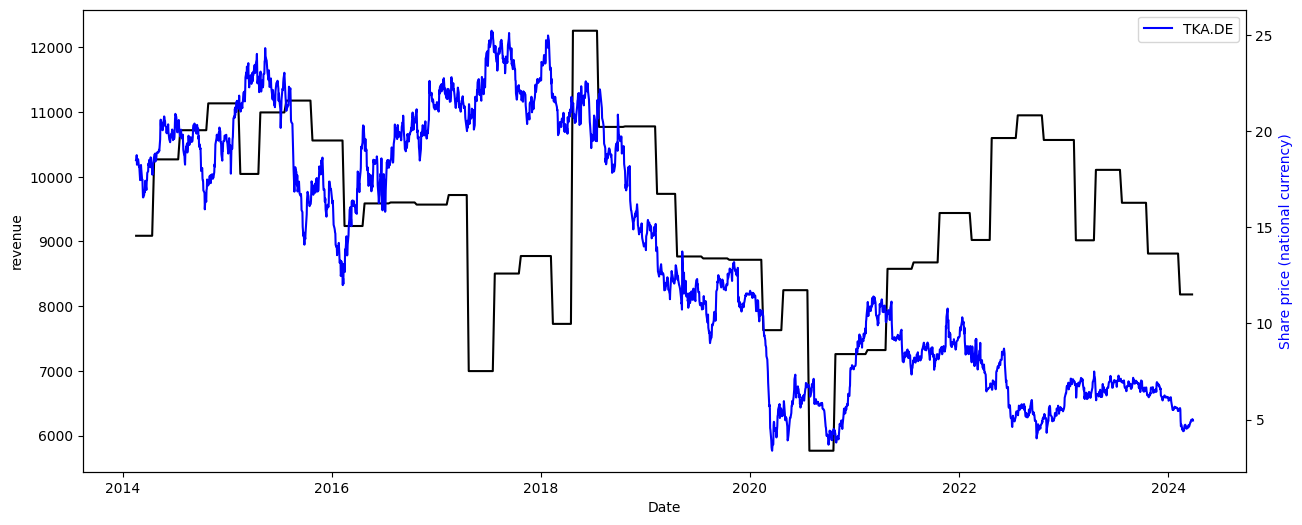

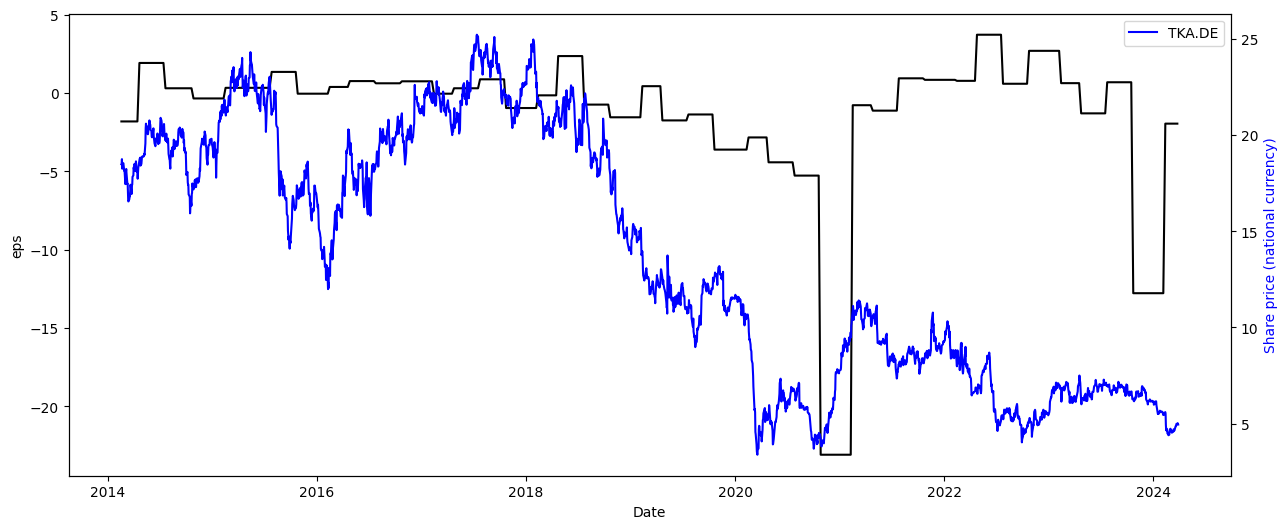

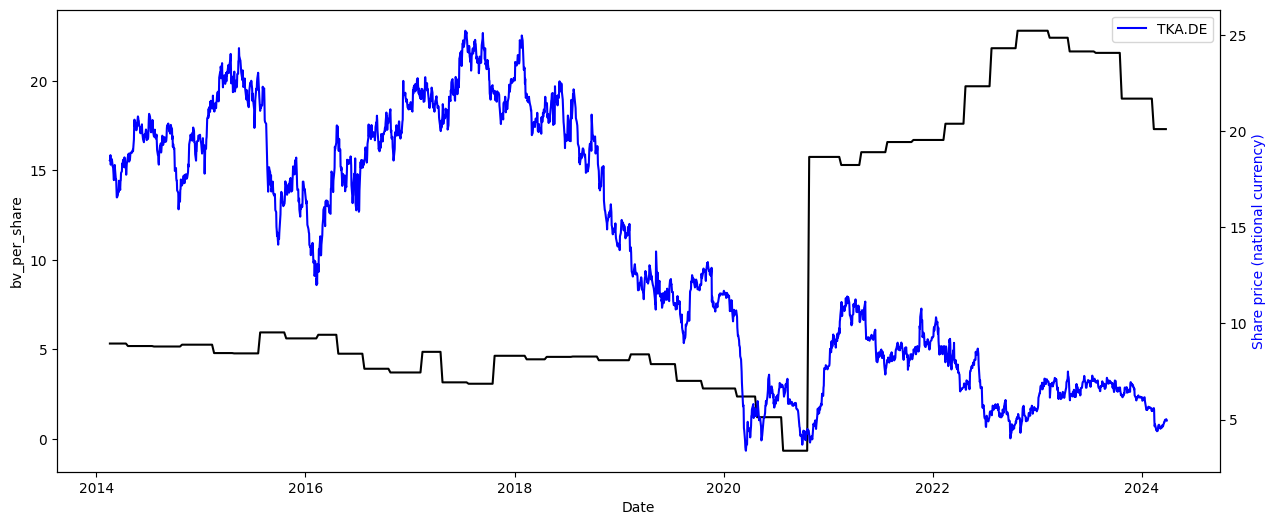

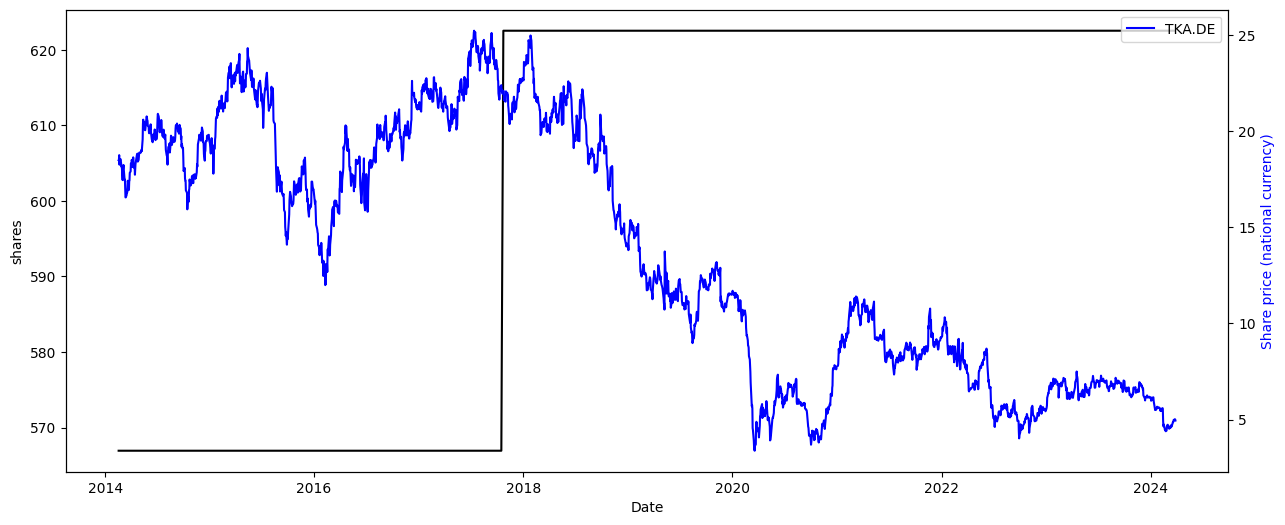

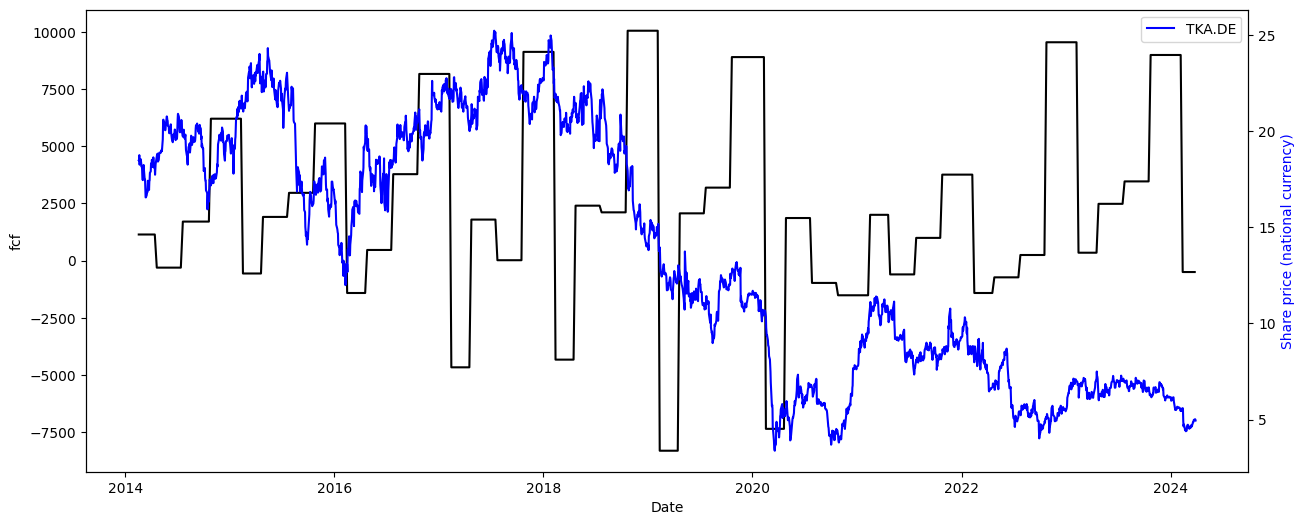

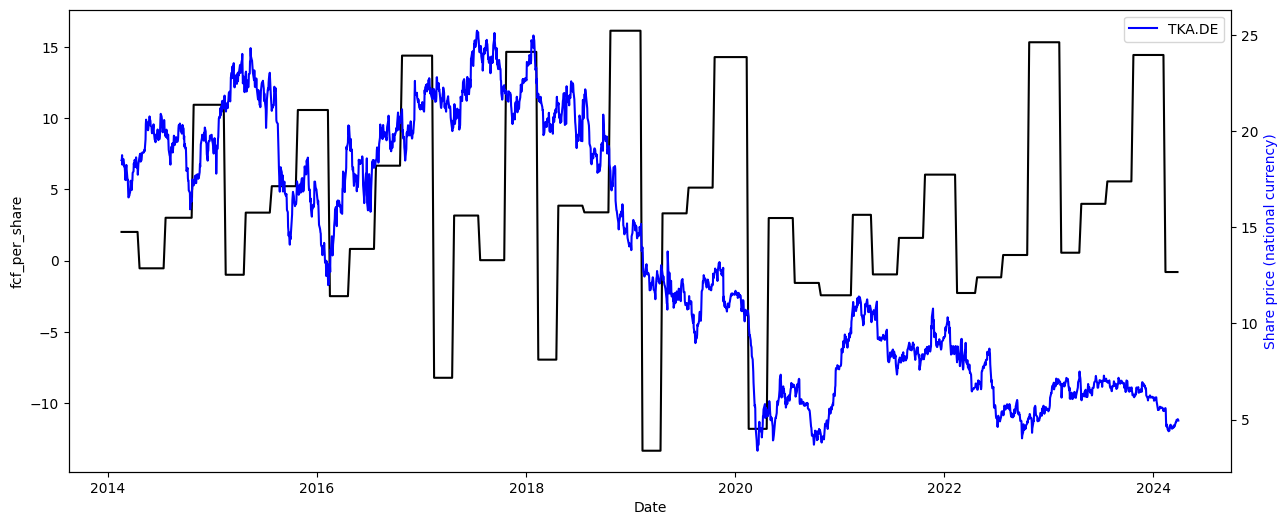

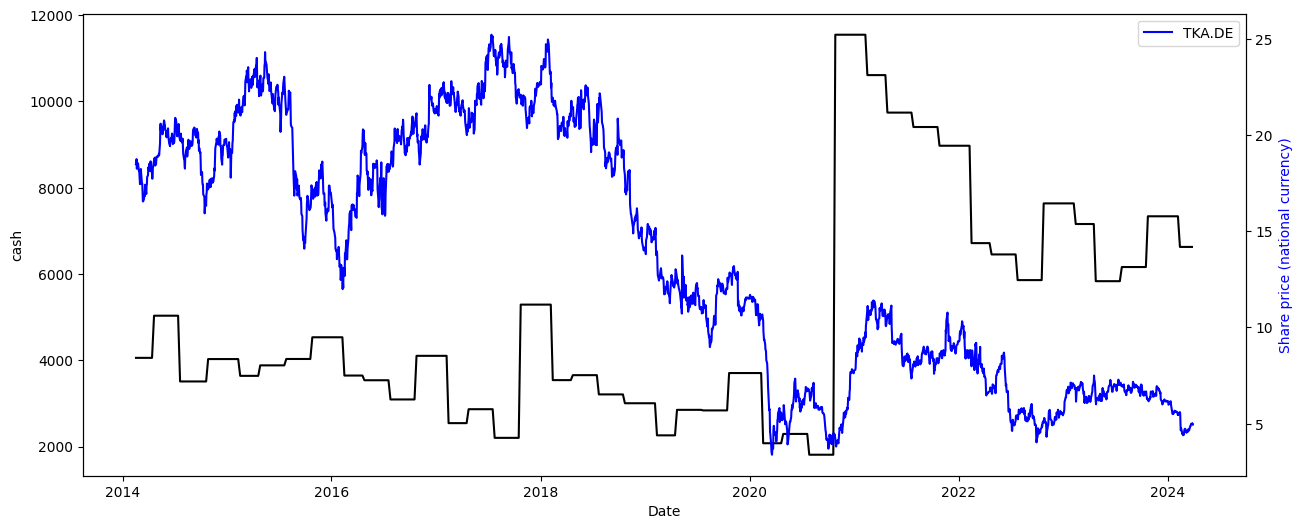

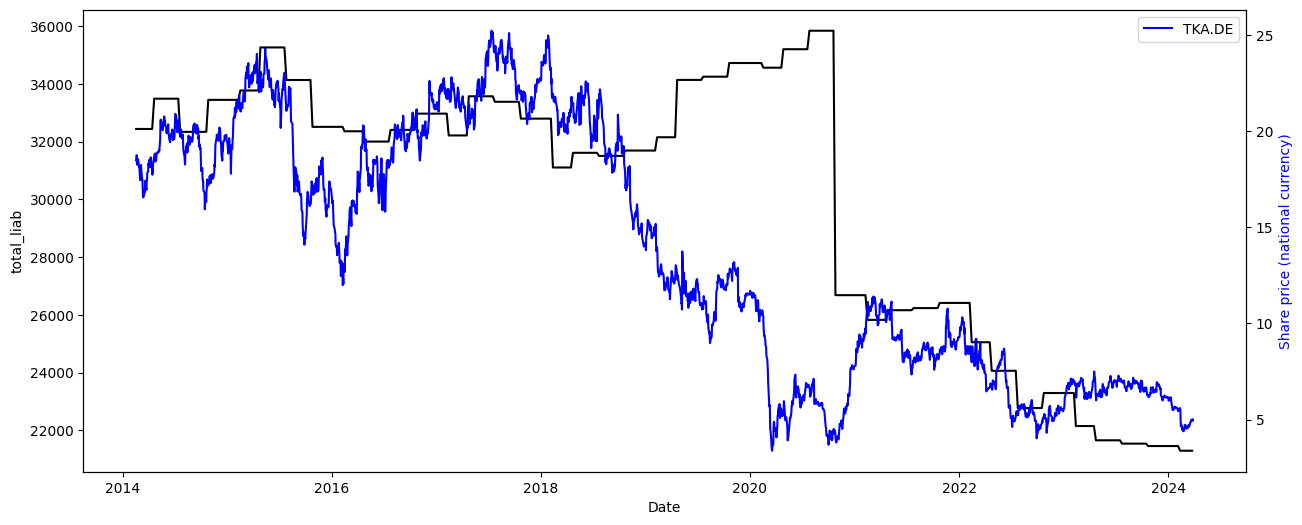

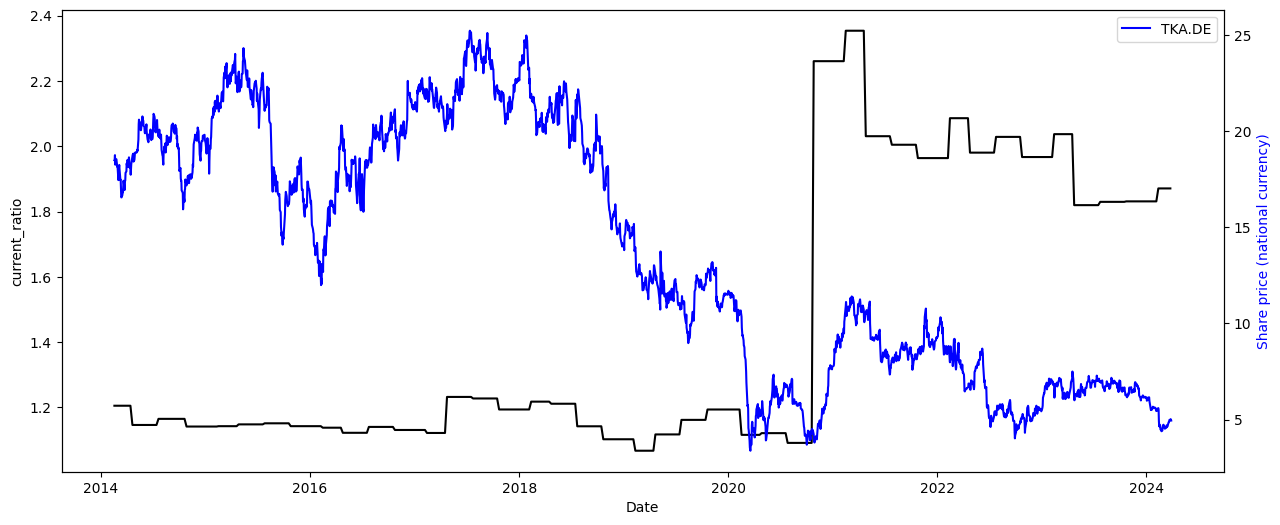

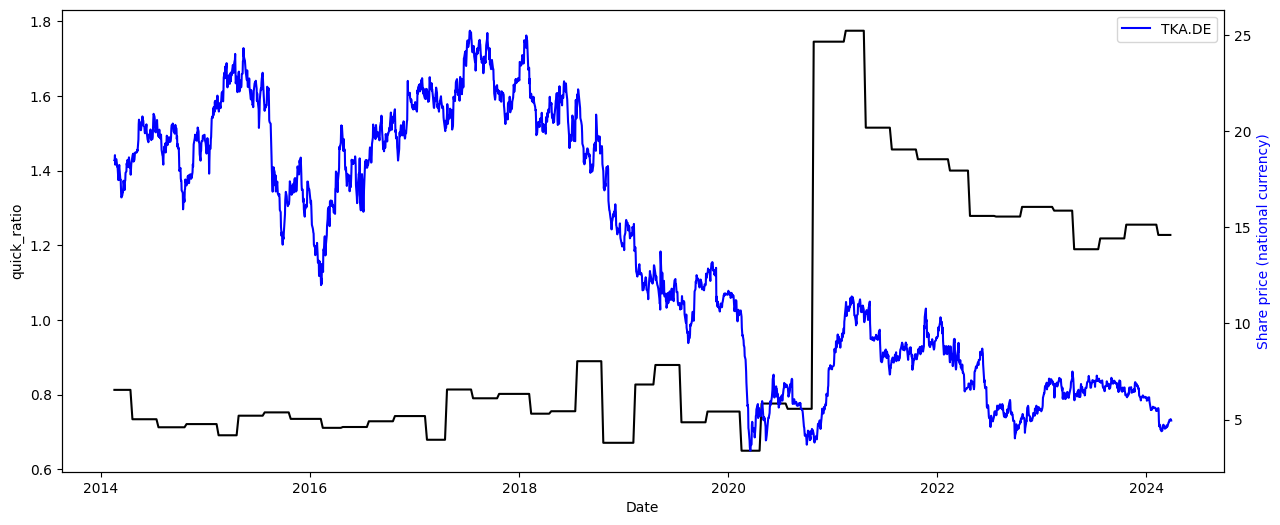

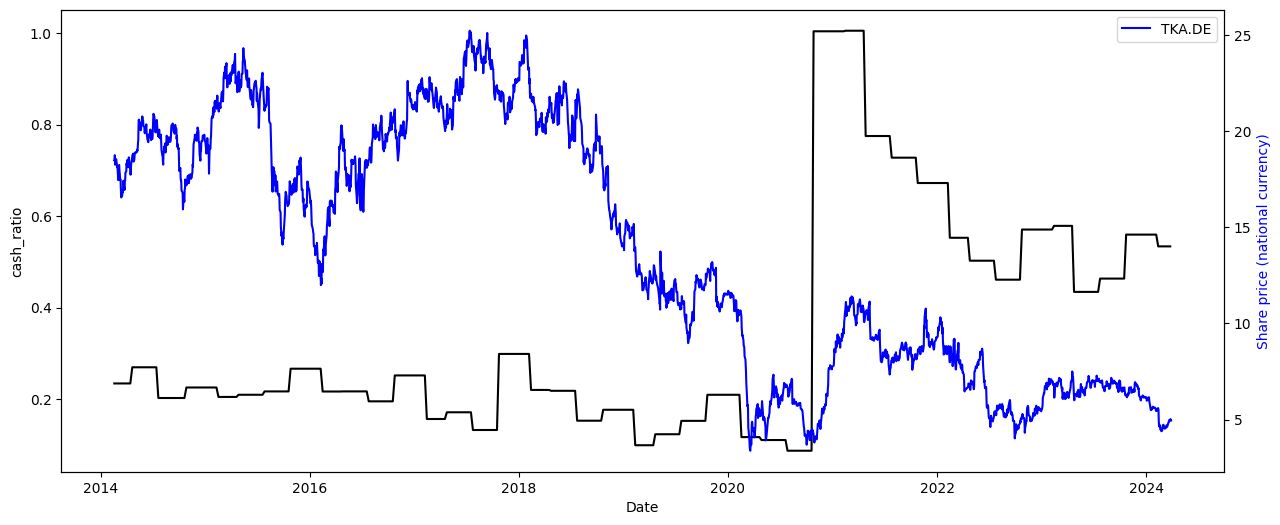

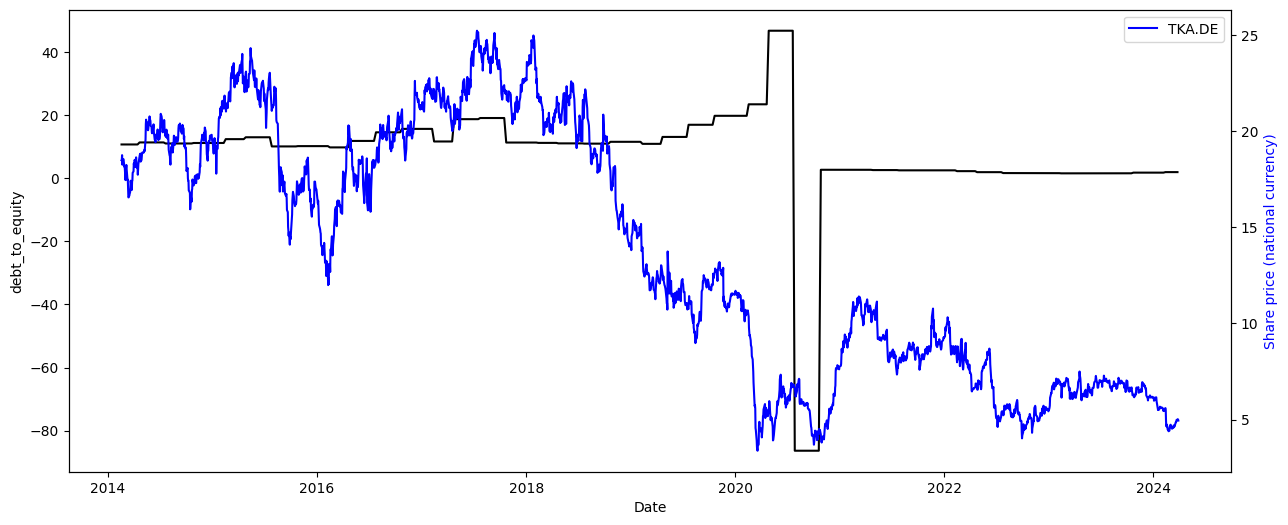

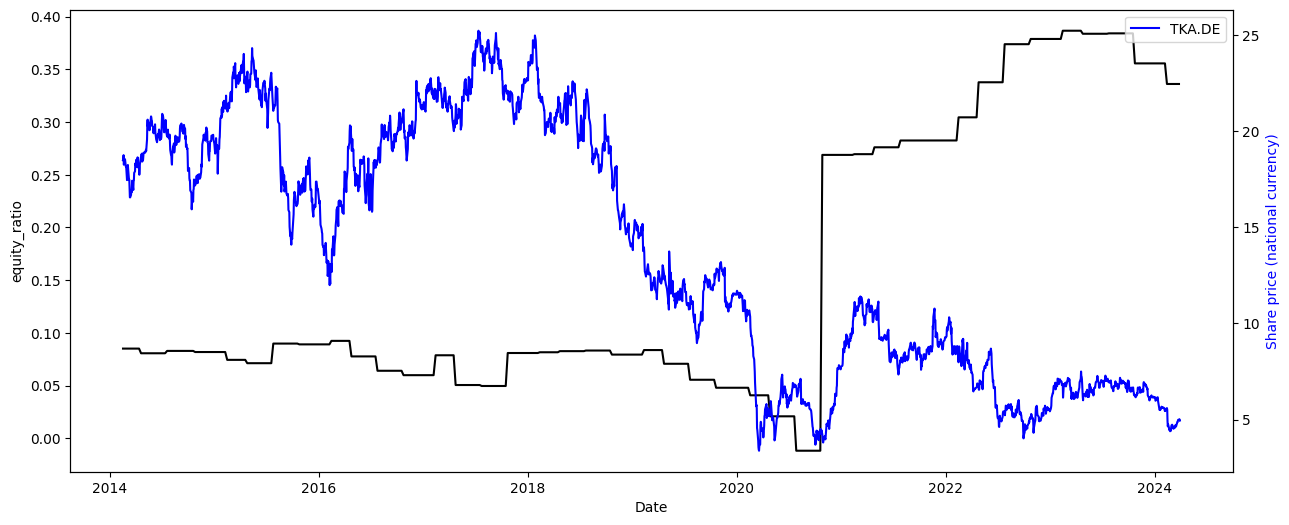

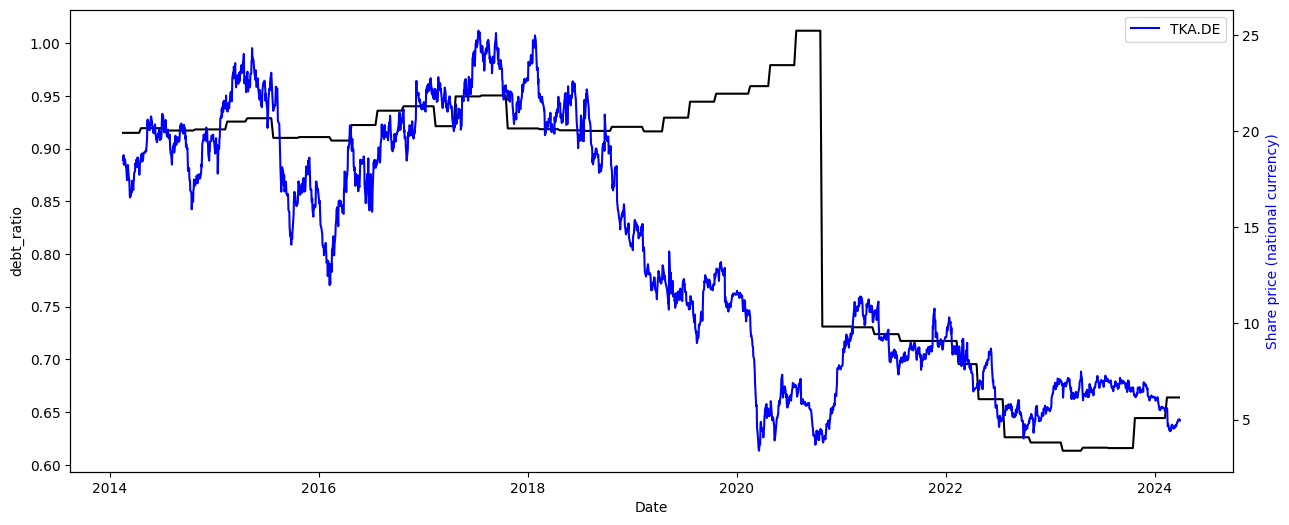

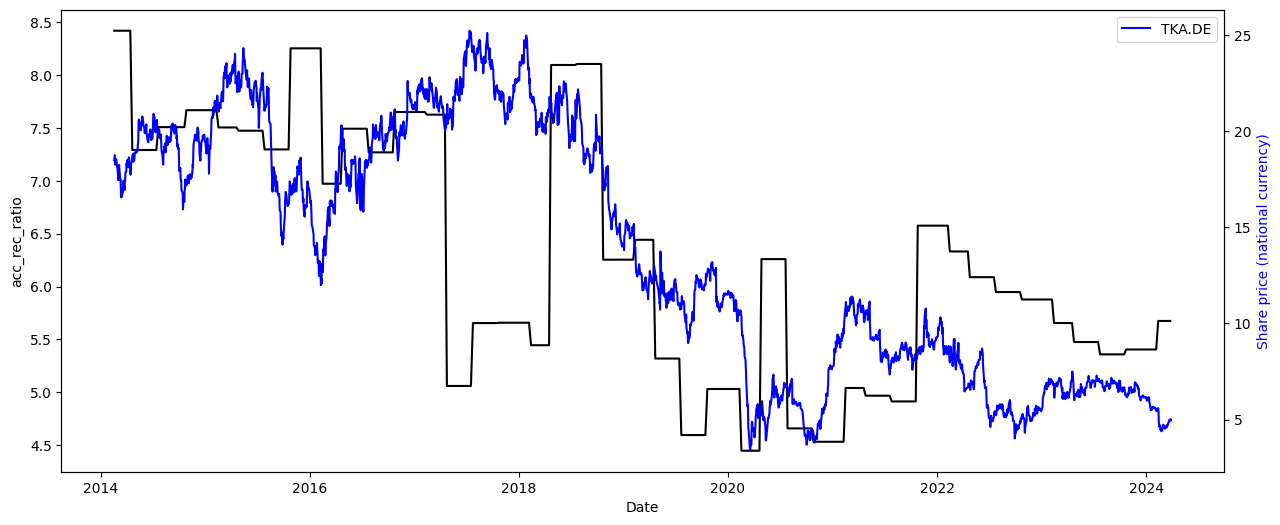

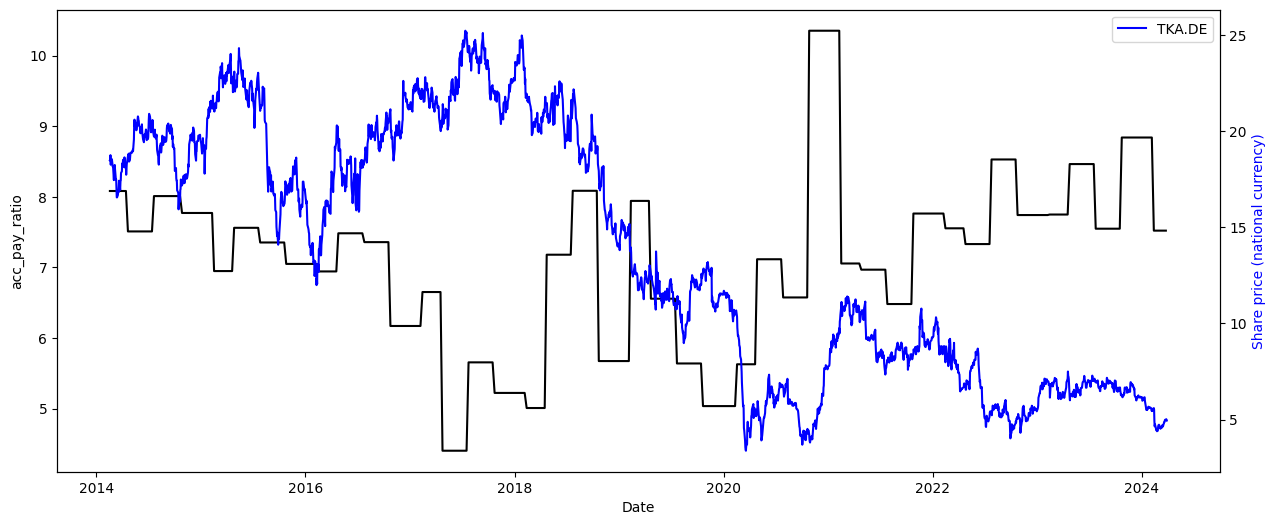

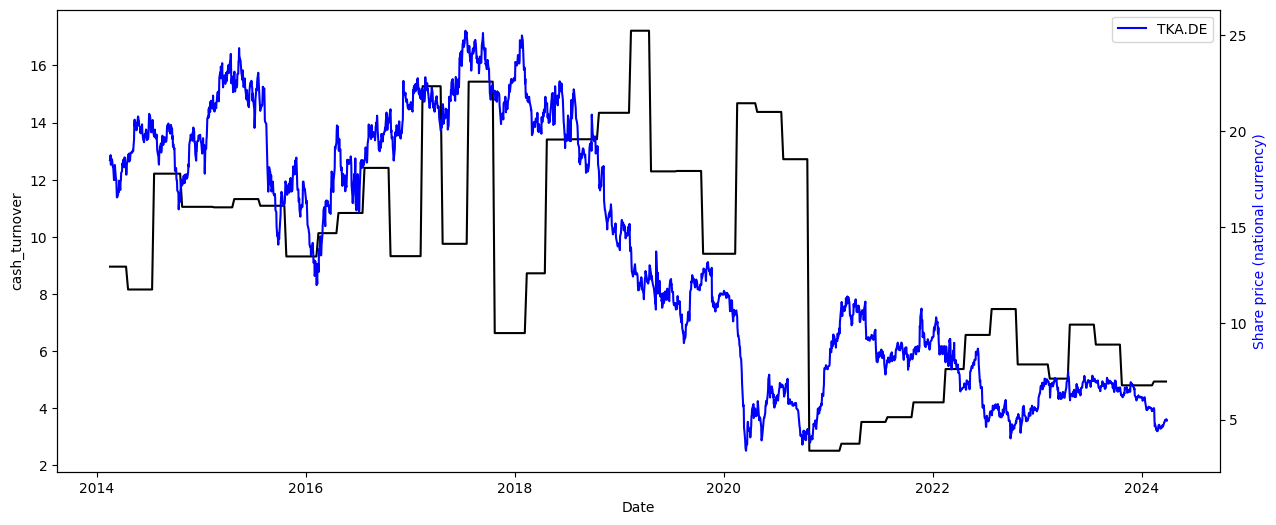

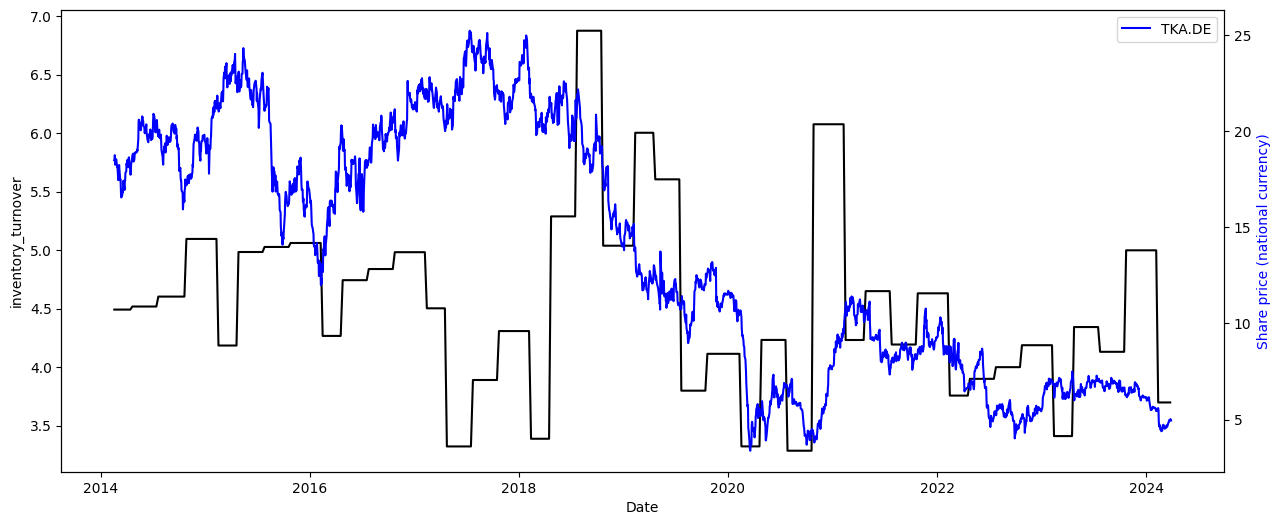

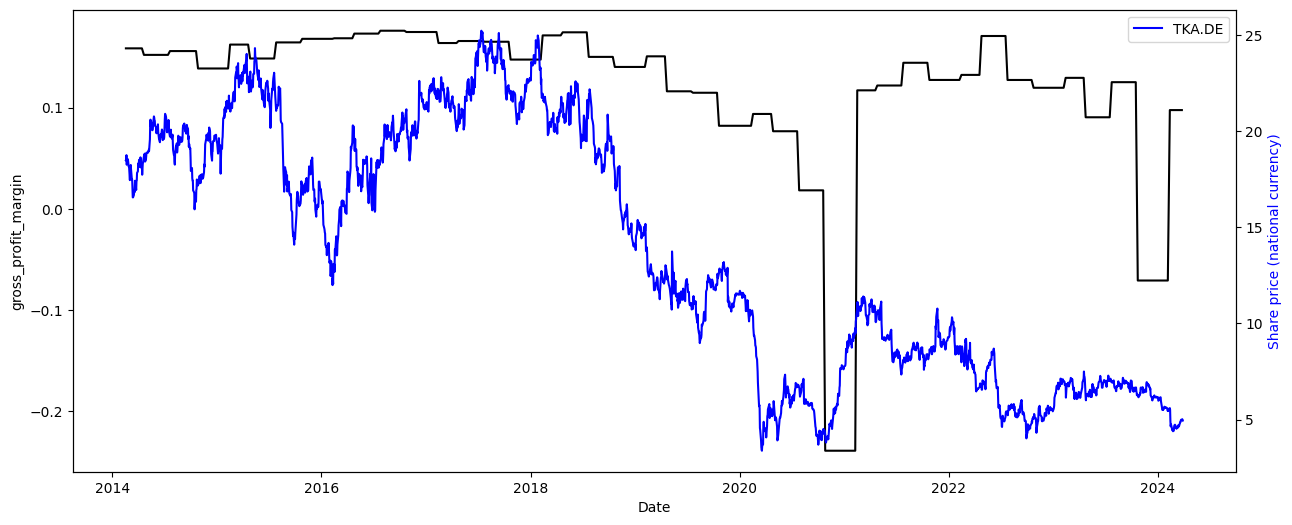

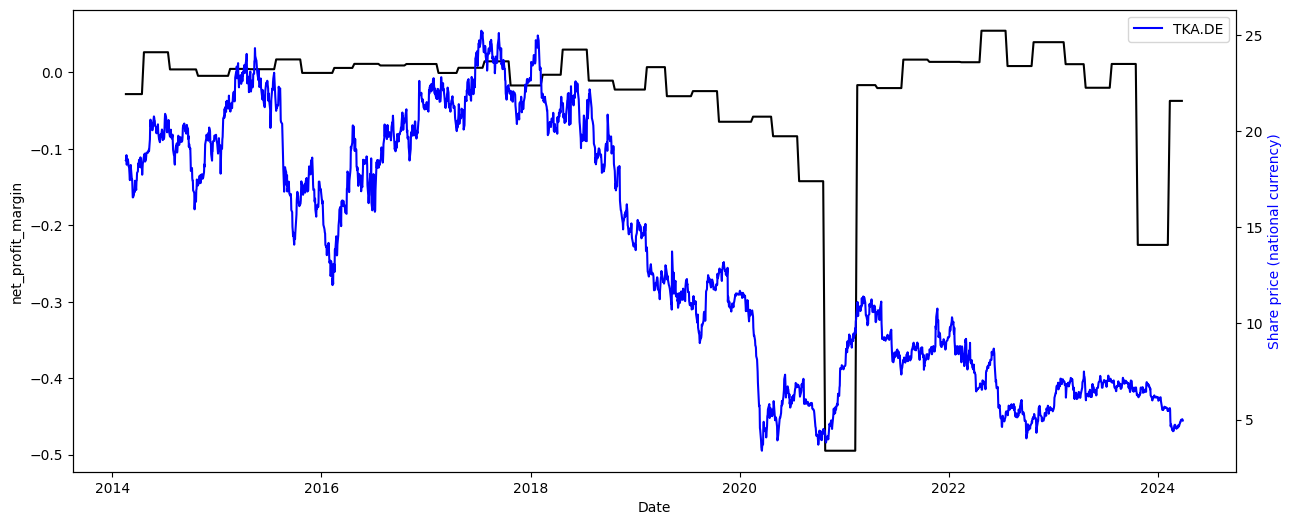

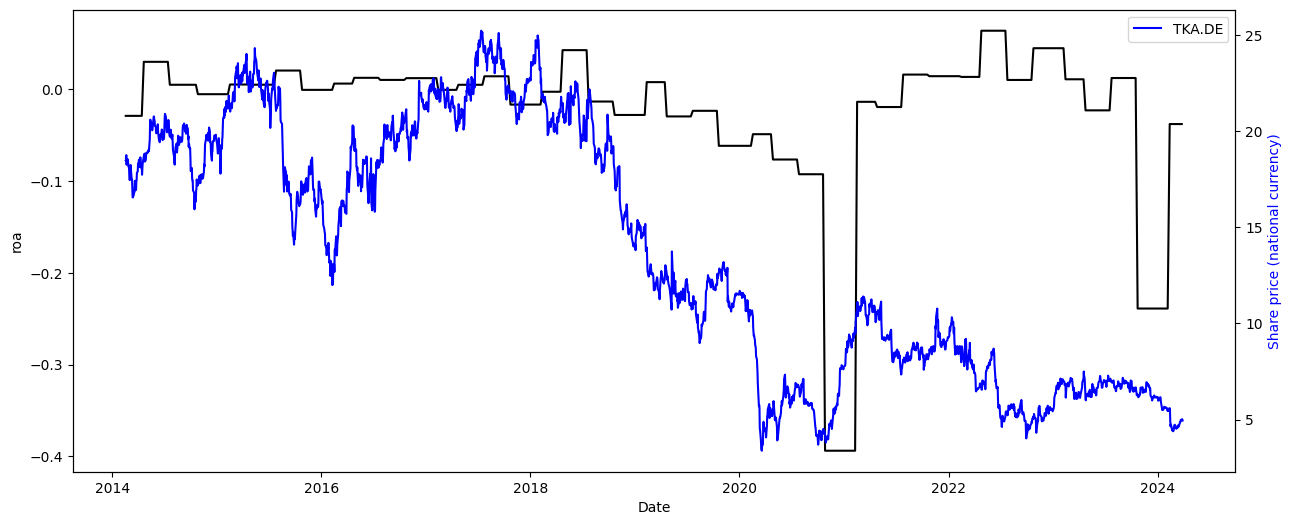

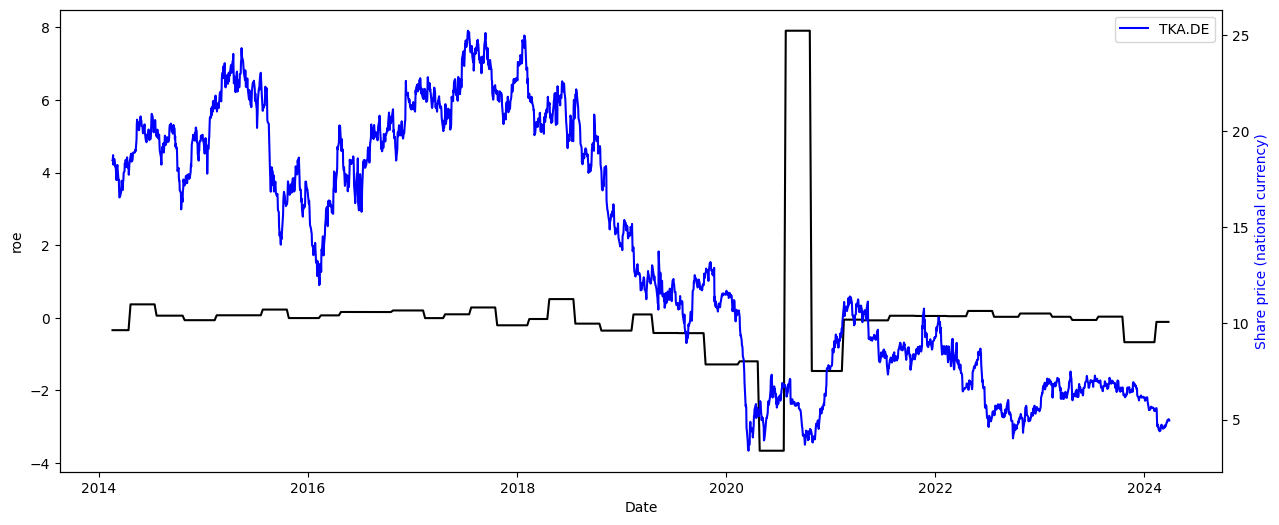

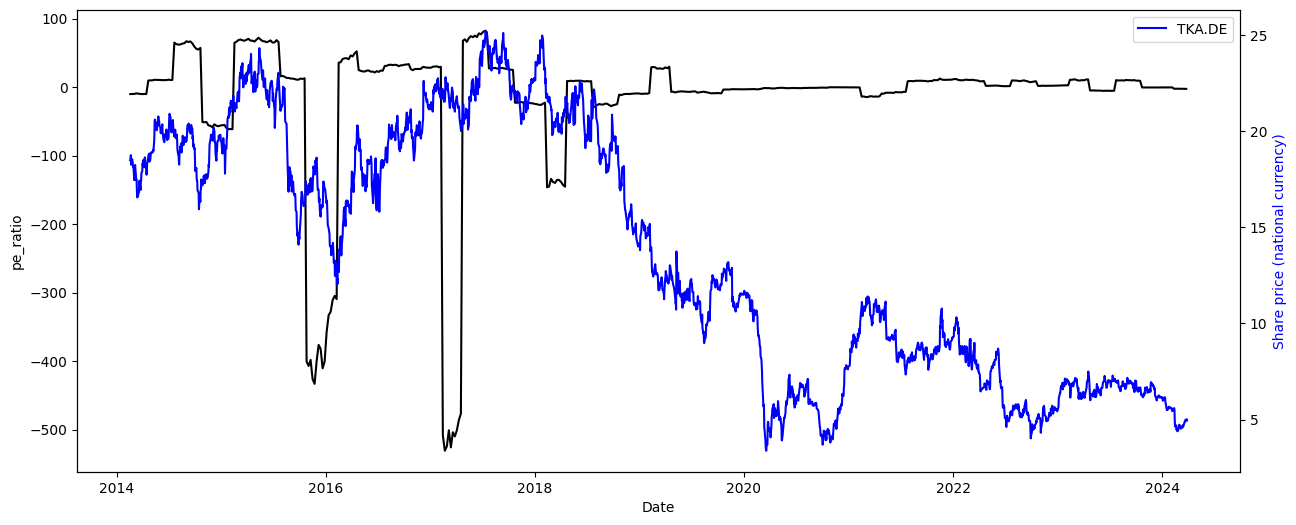

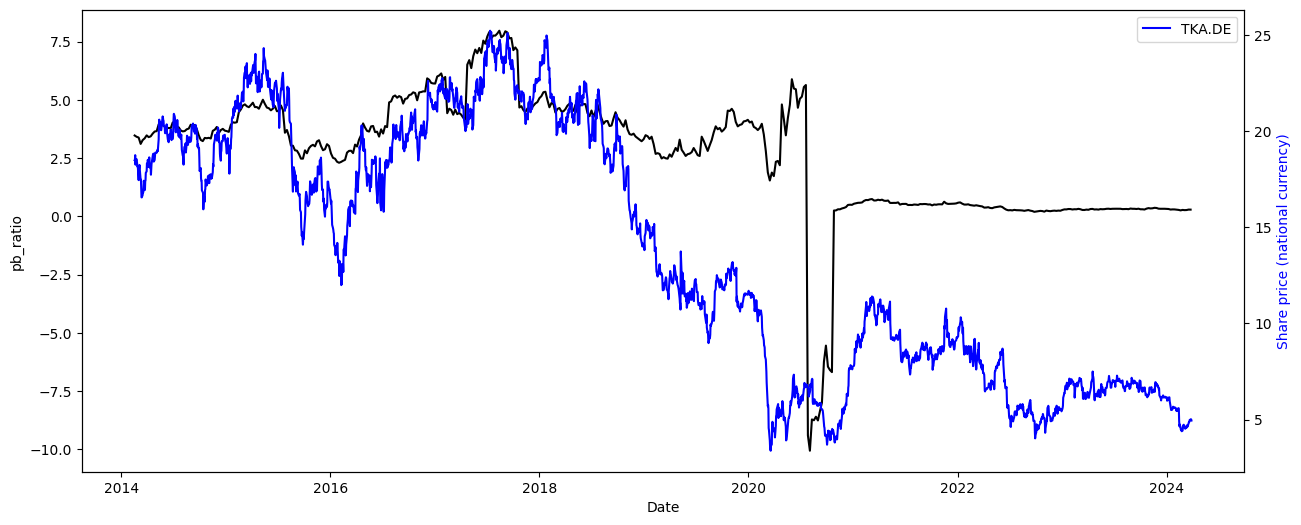

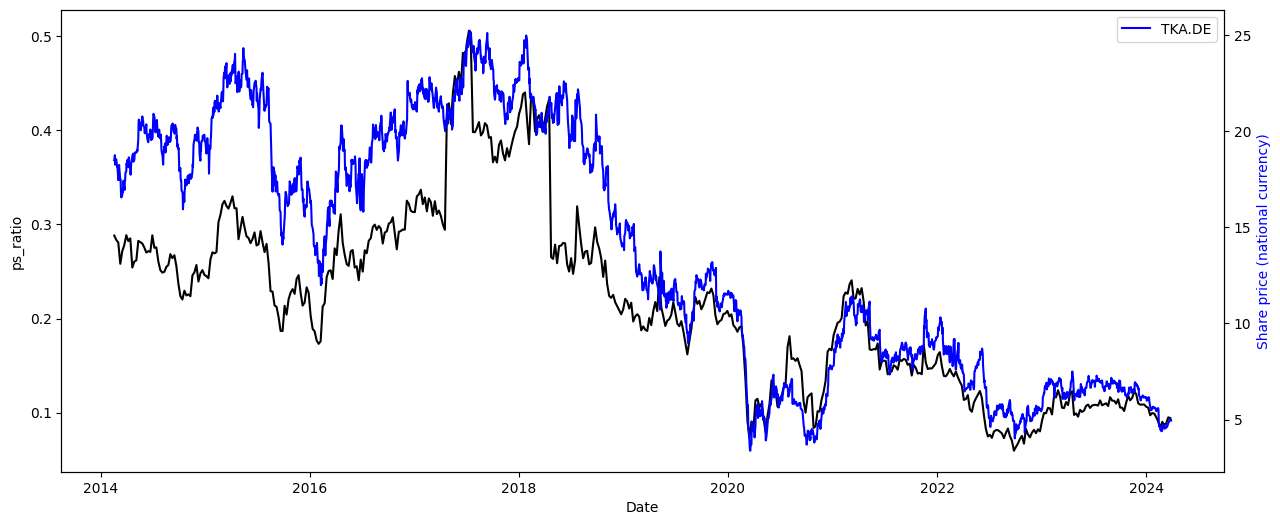

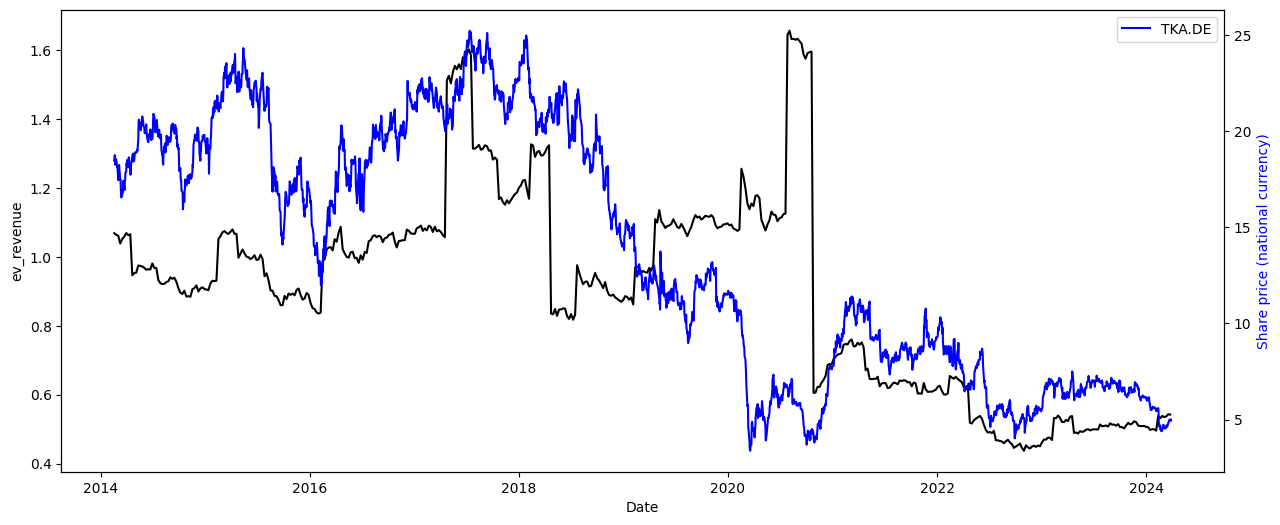

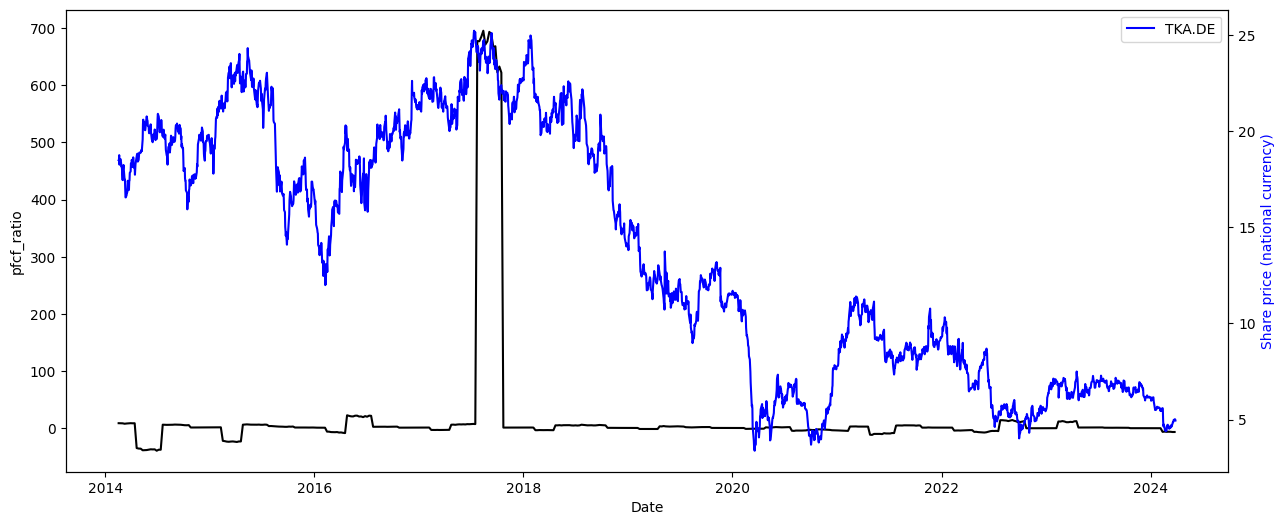

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

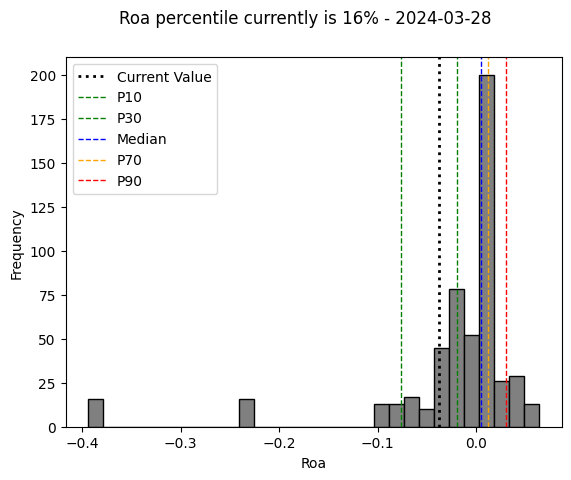

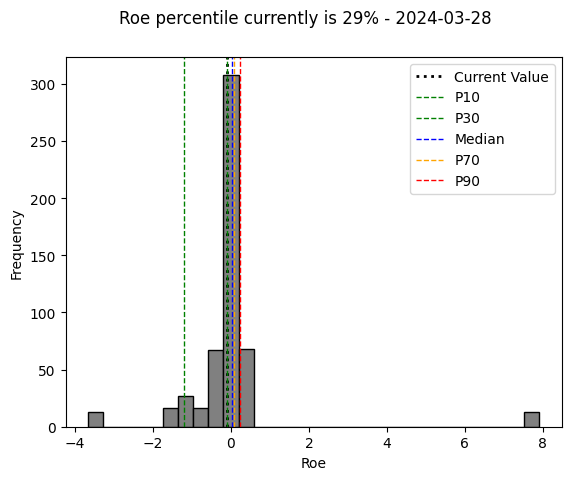

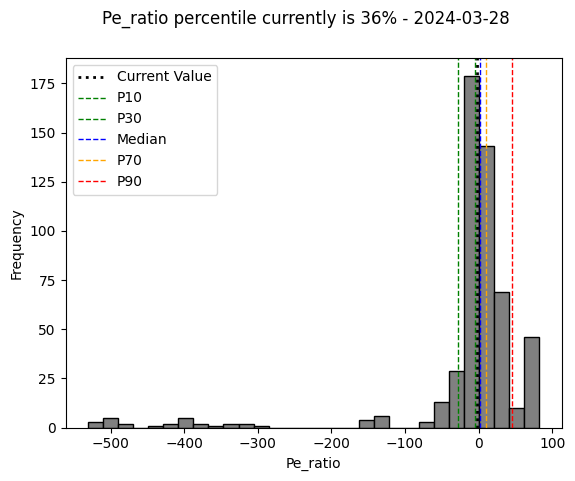

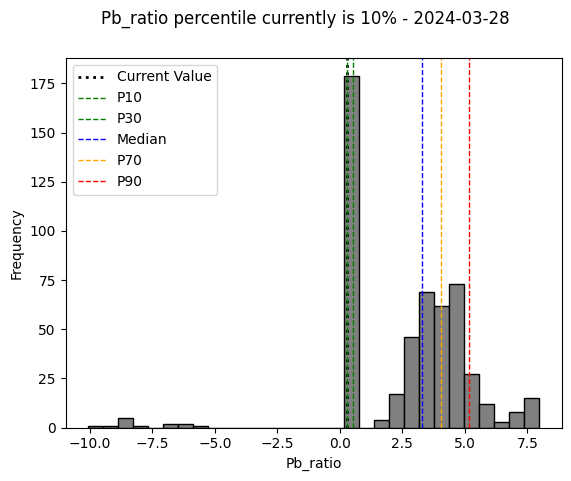

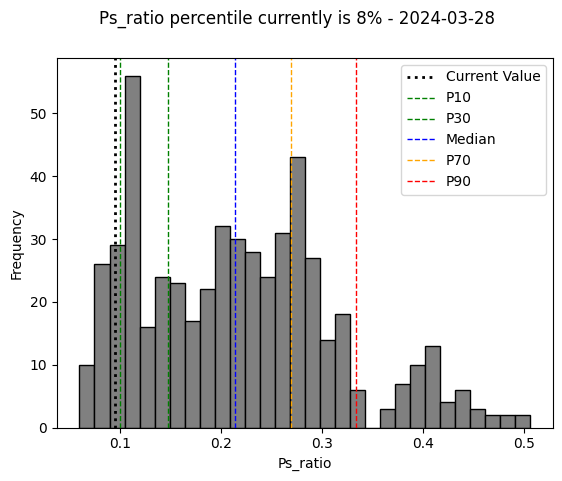

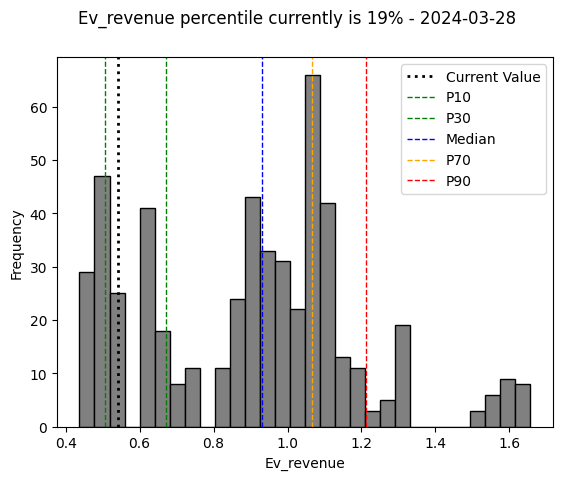

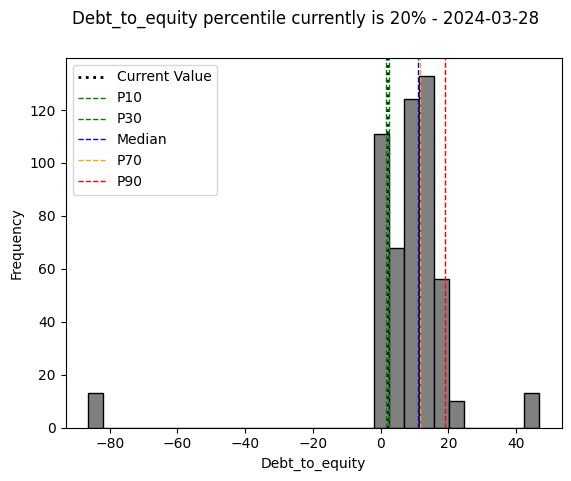

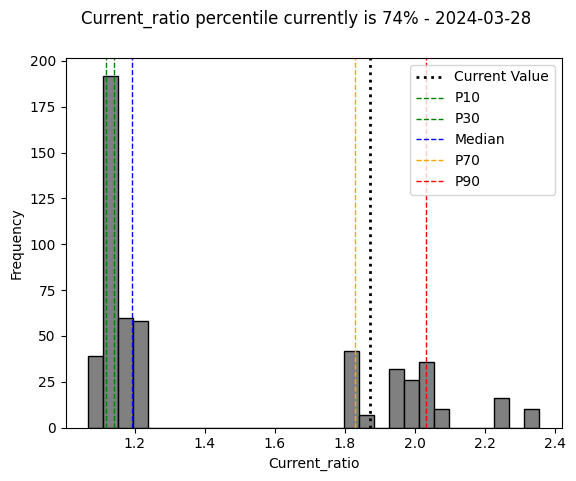

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.149766,-0.014551,0.257783,0.222301,0.063925,0.137102,-0.261166
roe,0.149766,1.000000,0.017315,-0.551510,0.029527,0.290626,-0.908610,-0.105731
pe_ratio,-0.014551,0.017315,1.000000,-0.024797,-0.070131,-0.030305,-0.014774,0.130497
pb_ratio,0.257783,-0.551510,-0.024797,1.000000,0.731429,0.397363,0.816685,-0.545706
ps_ratio,0.222301,0.029527,-0.070131,0.731429,1.000000,0.705351,0.270920,-0.589071
ev_revenue,0.063925,0.290626,-0.030305,0.397363,0.705351,1.000000,-0.017809,-0.773389
debt_to_equity,0.137102,-0.908610,-0.014774,0.816685,0.270920,-0.017809,1.000000,-0.213812
current_ratio,-0.261166,-0.105731,0.130497,-0.545706,-0.589071,-0.773389,-0.213812,1.000000


0 timestemos have been found!


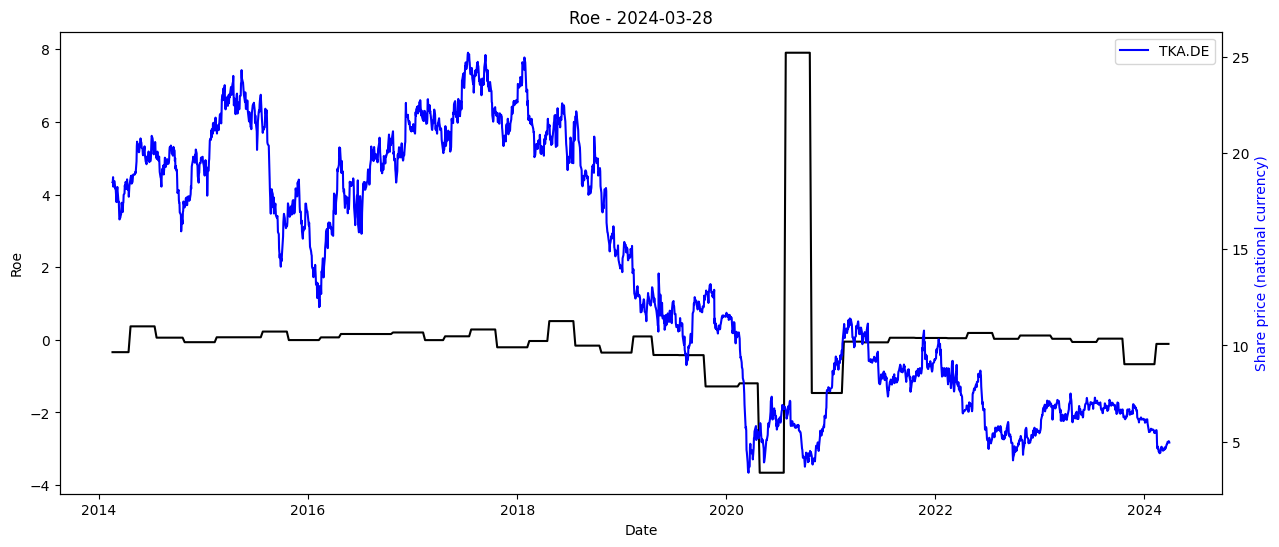

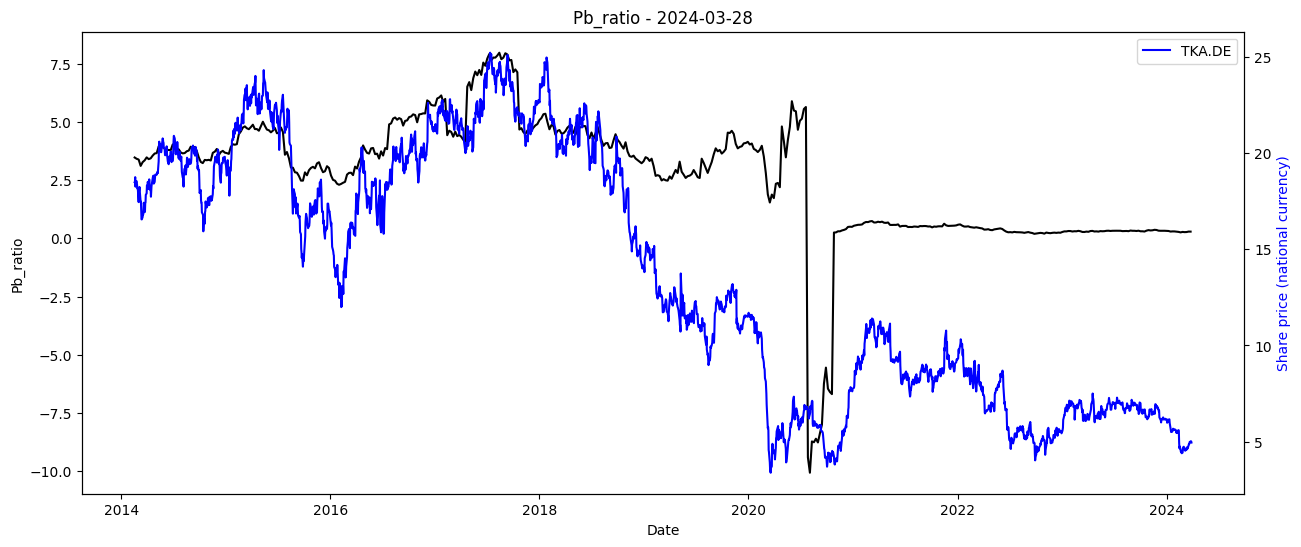

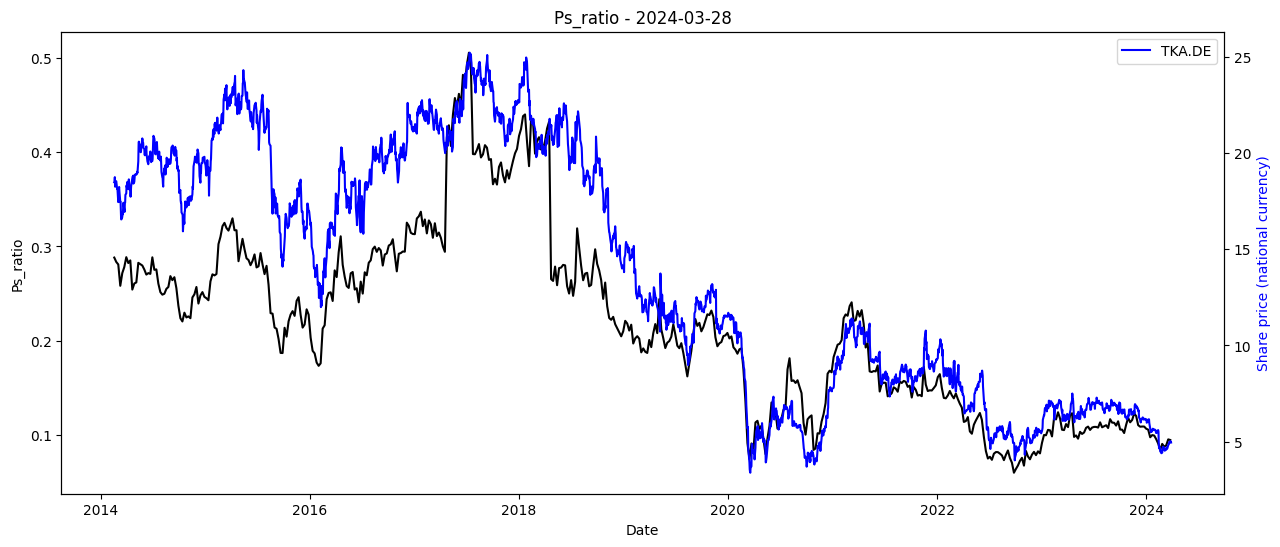

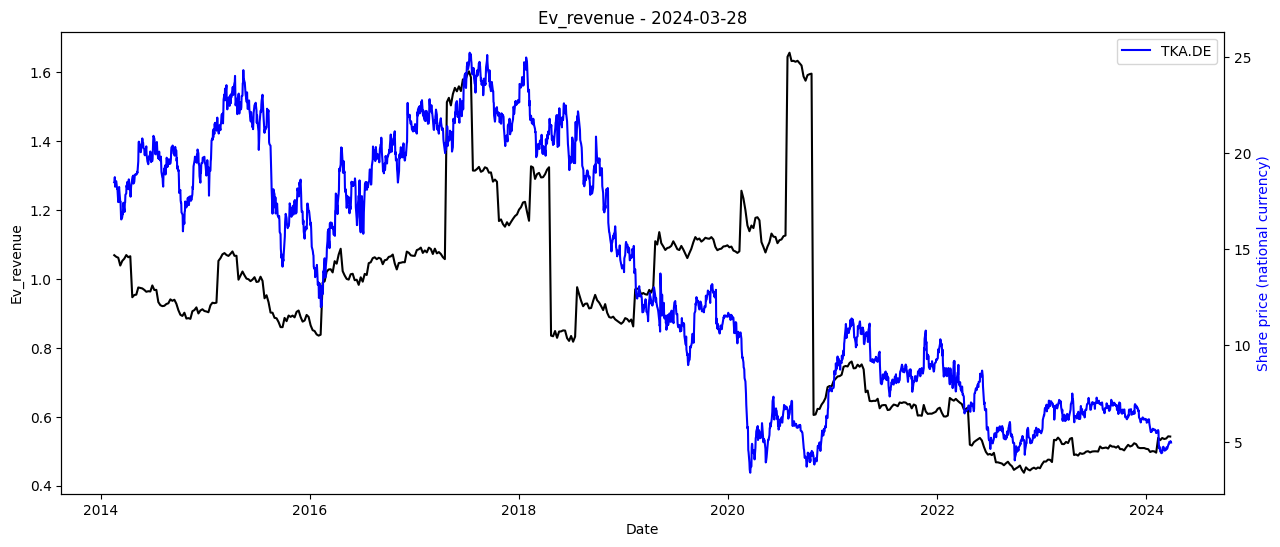

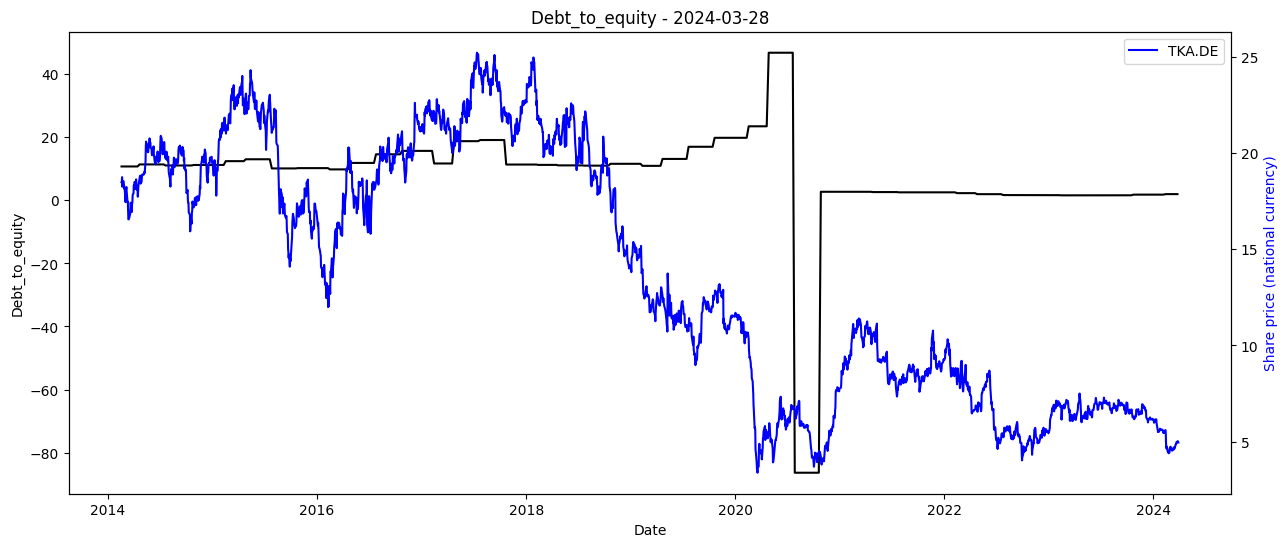

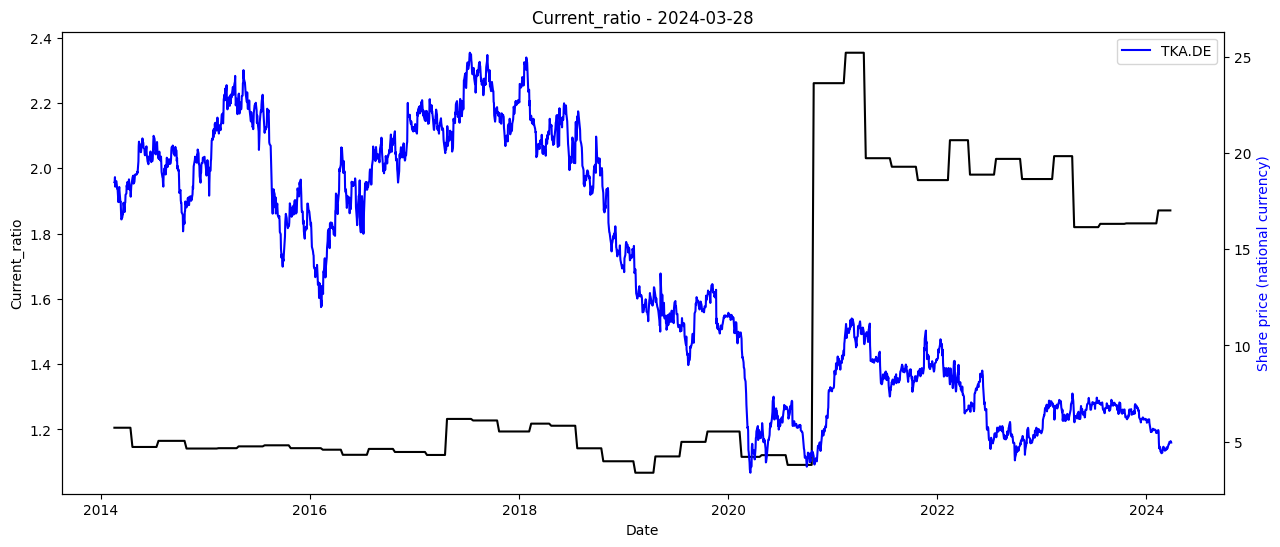

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )